# Saver 1

In [11]:
import tensorflow as tf
state1 = tf.Variable(0, name = "state1")
state2 = tf.Variable(10, name = "state2")
init_op = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init_op)
    save_path = saver.save(sess, "/tmp/model1.ckpt")
    print(f"Model saved in file : {save_path}")

Model saved in file : /tmp/model1.ckpt


# Saver 2

In [10]:
import tensorflow as tf
state1 = tf.Variable(0, name = "state1")
state2 = tf.Variable(10, name = "state2")
init_op = tf.global_variables_initializer()
saver = tf.train.Saver({"mys2":state2})
with tf.Session() as sess:
    sess.run(init_op)
    save_path = saver.save(sess, "/tmp/model2.ckpt")
    print(f"Model saved in file : {save_path}")

Model saved in file : /tmp/model2.ckpt


# Restore

In [2]:
import tensorflow as tf
state1 = tf.Variable(0, name = "state1")
state2 = tf.Variable(5, name = "state2")
# one = tf.constant(1)
# new_value = tf.add(state2, one)
# update = tf.assign(state2, new_value)
init_op = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init_op)
    saver.restore(sess, "/tmp/model.ckpt")
    print("Model restored from file")
    print(sess.run(state2))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored from file
10


In [3]:
import tensorflow as tf
state1 = tf.Variable(0, name = "state1")
state2 = tf.Variable(5, name = "state2")
# one = tf.constant(1)
# new_value = tf.add(state2, one)
# update = tf.assign(state2, new_value)
init_op = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "/tmp/model.ckpt")
    print("Model restored from file")
    sess.run(init_op)
    print(sess.run(state2))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored from file
5


# Saver and Restore

In [6]:
import tensorflow as tf
state1 = tf.Variable(0, name = "state1")
state2 = tf.Variable(10, name = "state2")
init_op = tf.global_variables_initializer()
saver = tf.train.Saver({"mys2":state2})
one = tf.constant(1)
new_value = tf.add(state2, one)
update = tf.assign(state2, new_value)
with tf.Session() as sess:
    sess.run(init_op)
    sess.run(update)
    save_path = saver.save(sess, "/tmp/model1.ckpt")
    print(f"Model saved in file : {save_path}")
    print(sess.run(state2))

Model saved in file : /tmp/model1.ckpt
11


In [1]:
import tensorflow as tf
state1 = tf.Variable(0, name = "state1")
state2 = tf.Variable(5, name = "state2")
init_op = tf.global_variables_initializer()
saver = tf.train.Saver({"mys2":state2})
with tf.Session() as sess:
    saver.restore(sess, "/tmp/model1.ckpt")
    print("Model restored from file")
#     sess.run(init_op)
    print(sess.run(state2))

INFO:tensorflow:Restoring parameters from /tmp/model1.ckpt
Model restored from file
11


# TF2

In [2]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1
tf1.disable_eager_execution() # ㅆㅂ
state = tf.Variable(0, name = "counter")
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf1.assign(state, new_value)
init_op = tf1.global_variables_initializer()
writer = tf1.summary.FileWriter("/tmp/lotto2", graph=tf1.get_default_graph()) # 2.3.1 버전에서는 FileWriter가 안된다. 2 버전거에 맞춰서 사용하자
with tf1.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(update))

0
2
4
6


In [3]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1
tf1.disable_eager_execution()
tf1.reset_default_graph() # 추가
state = tf.Variable(0, name = "counter")
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf1.assign(state, new_value)
init_op = tf1.global_variables_initializer()
writer = tf1.summary.FileWriter("/tmp/lotto2", graph=tf1.get_default_graph()) # 2.3.1 버전에서는 FileWriter가 안된다. 2 버전거에 맞춰서 사용하자
with tf1.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(update))

0
2
4
6


In [8]:

import tensorflow as tf
import tensorflow.compat.v1 as tf1
import numpy as np
tf1.reset_default_graph()
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0), name="weight")
b = tf.Variable(tf.zeros([1]), name="zeros")
y = W * x_data + b
writer = tf1.summary.FileWriter("/tmp/lotto1", graph=tf1.get_default_graph())
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf1.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf1.global_variables_initializer()
sess = tf1.Session()
sess.run(init)
for step in range(201):
    sess.run(train)
    writer = tf1.summary.FileWriter("tmp/lotto1", graph=sess.graph)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

sess.close()


0 [0.75478107] [-0.08205453]
20 [0.28354654] [0.20110604]
40 [0.15050878] [0.27278614]
60 [0.11389914] [0.29251122]
80 [0.1038248] [0.29793924]
100 [0.10105253] [0.29943293]
120 [0.10028966] [0.29984394]
140 [0.10007972] [0.29995707]
160 [0.10002193] [0.2999882]
180 [0.10000605] [0.29999676]
200 [0.10000167] [0.29999912]


In [3]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1
import numpy as np
tf1.reset_default_graph()
tf1.disable_eager_execution()

with tf1.name_scope("DefineVariable"):
    x_data = np.random.rand(100).astype(np.float32)
    y_data = x_data * 0.1 + 0.3
    W = tf.Variable(tf.random.uniform([1], -1.0, 1.0), name="weight")
    b = tf.Variable(tf.zeros([1]), name="zeros")
    y = W * x_data + b
    
with tf1.name_scope("Logit"):
    loss = tf.reduce_mean(tf.square(y - y_data))
    optimizer = tf1.train.GradientDescentOptimizer(0.5)
    train = optimizer.minimize(loss)
    
init = tf1.global_variables_initializer()
sess = tf1.Session()
sess.run(init)
for step in range(201):
    sess.run(train)
    writer = tf1.summary.FileWriter("/tmp/lotto1", graph=sess.graph)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

sess.close()

0 [0.7414111] [-0.12804663]
20 [0.25285485] [0.21025571]
40 [0.13519403] [0.27933687]
60 [0.10810323] [0.29524243]
80 [0.10186573] [0.2989046]
100 [0.10042958] [0.2997478]
120 [0.10009891] [0.29994193]
140 [0.10002278] [0.29998663]
160 [0.10000525] [0.2999969]
180 [0.10000122] [0.2999993]
200 [0.10000029] [0.29999983]


In [9]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1
import numpy as np
tf1.enable_eager_execution()
x_data = np.random.rand(100).astype('f')
y_data = x_data * .1 + .3

init = lambda : (tf.Variable(tf.random.uniform([1], -1., 1.), name="Weight"),
                 tf.Variable(tf.random.uniform([1], -1., 1.), name="Bias"))
W, b = init()
yp = lambda x : W*x +b
mse = lambda yp, yt : tf.reduce_mean(tf.square(yp - yt))

way = 3
if way == 1:
    print("Way 1")
    for step in range(10):
        with tf.GradientTape() as tape:
            y = yp(x_data)
            loss = mse(y, y_data)
        grads = tape.gradient(loss, [W, b])
        if step % 200 == 0:
            print(f"\nW : {W.numpy()},\nb = {b.numpy()},\ng[0] : {grads[0].numpy()},\ng[1] :{grads[1].numpy()}")
        W.assign(W - 0.01 * grads[0].numpy())
        b.assign(b - 0.01 * grads[1].numpy())
elif way == 2:
    print("Way 2")
    optimizer = tf.optimizers.SGD(learning_rate=0.1)
    for step in range(10):
        with tf.GradientTape() as tape:
            y = yp(x_data)
            loss = mse(y, y_data)
        grads = tape.gradient(loss, [W, b])
        process_grads = [g for g in grads]
        grads_and_vars = zip(process_grads, [W, b])
        if step % 20 == 0:
            print(f"\nW={W.numpy()}, \nb={b.numpy()}, \ng={grads[0].numpy()}, \ng[1]={grads[1].numpy()}")
        optimizer.apply_gradients(grads_and_vars)
elif way == 3:
    print("Way 3")
    y_pred, yt = yp(x_data), y_data
    optimzier = tf.optimizers.SGD(learning_rate=0.1)
    for step in range(201):
        if step % 20 == 0:
            print(f"\nW = {W.numpy()}, \nb = {b.numpy()}")
        mse_min = lambda : tf.reduce_mean(tf.square((W * x_data + b) - yt))
        optimizer.minimize(mse_min, var_list=[W,b])

Way 3

rW = [-0.99373245], 
b = [-0.8594458]

rW = [-0.11317813], 
b = [0.4293017]

rW = [-0.06651666], 
b = [0.40346396]

rW = [-0.03093548], 
b = [0.3813601]

rW = [-0.00295876], 
b = [0.36397606]

rW = [0.01904024], 
b = [0.35030642]

rW = [0.03633872], 
b = [0.3395576]

rW = [0.04994111], 
b = [0.33110538]

rW = [0.06063708], 
b = [0.32445917]

rW = [0.06904771], 
b = [0.319233]

rW = [0.07566124], 
b = [0.31512353]


# Cost Function

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
X = [40., 22., 91.]
Y = [1., 2., 3.]
m = len(X)

hypothesis = lambda W: tf.multiply(W, X)
cost = lambda hx: tf.reduce_sum(tf.pow(hx-Y, 2)) / m

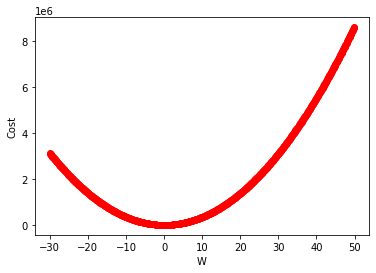

In [11]:
import numpy as np
W_val, cost_val = [], []
for i in np.arange(-30, 50, 0.1):
    xPos = i
    yPos = cost(hypothesis(xPos))
#     print(f"\nW = {xPos},\nCost = {yPos}")
    
    W_val.append(xPos)
    cost_val.append(yPos)

plt.plot(W_val, cost_val, 'ro')
plt.ylabel("Cost")
plt.xlabel('W')
plt.show()

# Optimization & Training

In [1]:
import tensorflow as tf

x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

In [2]:
W = tf.Variable(tf.random.uniform([1], -10, 1.0))
b = tf.Variable(tf.random.uniform([1], -10, 1.0))

hx = lambda x: W * x + b

In [3]:
cost = lambda : tf.reduce_mean(tf.square(hx(x_data) - y_data))

In [4]:
rate = tf.Variable(0.01)
opt = tf.optimizers.SGD(rate)

In [5]:
for step in range(1000):
    if step % 20 == 0:
        print(f"\n step : {step}, cost : {cost().numpy()}, W : {W.numpy()}, b : {b.numpy()}")
    opt.minimize(cost, var_list=[W, b])


 step : 0, cost : 411.60400390625, W : [-6.814324], b : [-3.629984]

 step : 20, cost : 3.7352497577667236, W : [0.31677023], b : [-0.48395875]

 step : 40, cost : 0.03691234812140465, W : [0.99292856], b : [-0.17789622]

 step : 60, cost : 0.003101018024608493, W : [1.0545869], b : [-0.1425584]

 step : 80, cost : 0.0025405653286725283, W : [1.057861], b : [-0.13328998]

 step : 100, cost : 0.002304880879819393, W : [1.0556976], b : [-0.12678124]

 step : 120, cost : 0.002093304181471467, W : [1.053133], b : [-0.1207997]

 step : 140, cost : 0.001901173614896834, W : [1.0506411], b : [-0.11512037]

 step : 160, cost : 0.0017266729846596718, W : [1.0482615], b : [-0.10970994]

 step : 180, cost : 0.001568200415931642, W : [1.0459934], b : [-0.104554]

 step : 200, cost : 0.0014242635807022452, W : [1.0438321], b : [-0.09964037]

 step : 220, cost : 0.001293540932238102, W : [1.0417721], b : [-0.09495766]

 step : 240, cost : 0.0011748134857043624, W : [1.0398088], b : [-0.09049511]

 

In [6]:
for step in range(1000):
    with tf.GradientTape() as tape:
        y_pred, y_true = hx(x_data), y_data
        loss = tf.reduce_mean(tf.square(y_pred - y_true))
    grads = tape.gradient(loss, [W, b])
    opt.apply_gradients(zip(grads, [W, b]))
    if step % 20 == 0:
        print(f"\n step : {step}, cost : {cost().numpy()}, W : {W.numpy()}, b : {b.numpy()}")


 step : 0, cost : 3.0134033295325935e-05, W : [1.0063757], b : [-0.01449334]

 step : 20, cost : 2.7368159862817265e-05, W : [1.0060761], b : [-0.01381223]

 step : 40, cost : 2.485652112227399e-05, W : [1.0057905], b : [-0.01316313]

 step : 60, cost : 2.257427513541188e-05, W : [1.0055183], b : [-0.01254452]

 step : 80, cost : 2.050313378276769e-05, W : [1.005259], b : [-0.011955]

 step : 100, cost : 1.86212346307002e-05, W : [1.0050118], b : [-0.01139314]

 step : 120, cost : 1.6911948478082195e-05, W : [1.0047762], b : [-0.01085766]

 step : 140, cost : 1.5359639292000793e-05, W : [1.0045519], b : [-0.01034738]

 step : 160, cost : 1.3949888852948789e-05, W : [1.0043379], b : [-0.00986113]

 step : 180, cost : 1.2669447642110754e-05, W : [1.004134], b : [-0.00939773]

 step : 200, cost : 1.1507218914630357e-05, W : [1.0039397], b : [-0.00895607]

 step : 220, cost : 1.0450595254951622e-05, W : [1.0037546], b : [-0.00853515]

 step : 240, cost : 9.491355740465224e-06, W : [1.0035

# Test

In [8]:
print(f"x={hx(2.5).numpy()}, x = 10 : {hx(10).numpy()}, x = [2.5, 10] : {hx([2.5, 10]).numpy()}")

x=[2.5001307], x = 10 : [10.004456], x = [2.5, 10] : [ 2.5001307 10.004456 ]


# Logistic Regression
# Binary Cross Entropy

In [11]:
import tensorflow as tf
import numpy as np
tf.get_logger().setLevel('ERROR')

xy = np.loadtxt("train.csv", delimiter=',', unpack=True, dtype="float32")

In [15]:
x_data = xy[:-1]
y_data = xy[-1]
W = tf.Variable(tf.random.uniform([1, len(x_data)], -1.0, 1.0))
h = lambda X: tf.matmul(W, X)
hx = lambda X: tf.math.divide(1., 1. + tf.math.exp(-h(X)))

In [16]:
cost = lambda Y: -tf.reduce_mean(Y * tf.math.log(hx(x_data)) +(1 - Y) * tf.math.log(1 - hx(x_data)))
rate = tf.Variable(.1)
opt = tf.optimizers.SGD(rate)

In [22]:
for step in range(2001):
    with tf.GradientTape() as tape:
        y = hx(x_data)
        loss = cost(y_data)
    grads = tape.gradient(loss, [W, b])
    opt.apply_gradients(zip(grads, [W, b]))
    
    if step % 200 == 0:
        print(f"step : {step}, grad : {W.numpy()}\n")
    
print('-'*60)

print(f'[1, 2, 2] : {hx([[1.], [2.], [2.]])}')
print(f'[1, 5, 5] : {hx([[1.], [5.], [5.]])}')
print(f'[1, 2, 2], [1, 5, 5] : {hx([[1., 1.], [2., 5.], [2., 5.]])}')
              

step : 0, grad : [[0.34711632 0.01776681 0.03512052]]

step : 200, grad : [[-1.6455262   0.14467394  0.37373805]]

step : 400, grad : [[-2.80193     0.2576081   0.53397244]]

step : 600, grad : [[-3.576776    0.3253545   0.64777553]]

step : 800, grad : [[-4.149074    0.3700175   0.73571414]]

step : 1000, grad : [[-4.5986185   0.40156808  0.80717826]]

step : 1200, grad : [[-4.9666743   0.42498264  0.8672526 ]]

step : 1400, grad : [[-5.277057    0.44300857  0.91899455]]

step : 1600, grad : [[-5.544655    0.45728606  0.9643812 ]]

step : 1800, grad : [[-5.779359    0.46885464  1.0047662 ]]

step : 2000, grad : [[-5.9880476  0.4784051  1.0411146]]

------------------------------------------------------------
[1, 2, 2] : [[0.04978339]]
[1, 5, 5] : [[0.83334905]]
[1, 2, 2], [1, 5, 5] : [[0.04978339 0.83334905]]
